# Correcting z jumps in morphologies

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from morphon import Morpho, plot

In [3]:
m = Morpho('zjumps.swc')

In [4]:
jumps = m.jumps()
print 'detected', len(jumps), 'z-jumps'

detected 17 z-jumps


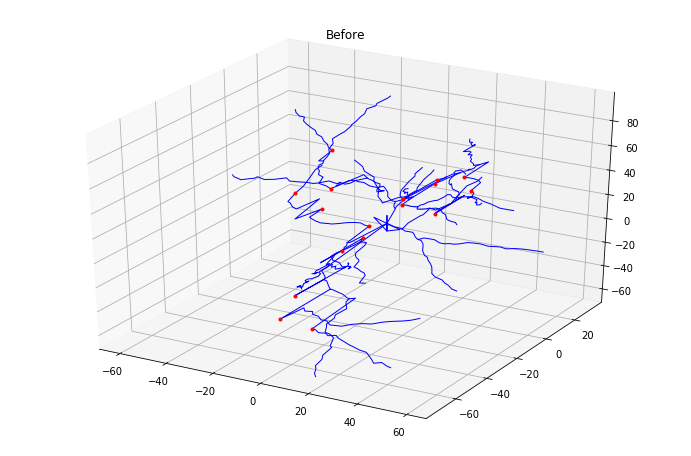

In [5]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
plot(m, ax, projection='3d')
plot(m, ax, projection='3d', idents=jumps, 
     linestyle=' ', marker='.', color='r')
plt.title('Before');

In [6]:
def correct_jumps(m, jumps):
    for ident in jumps:
        parent = m.parent(ident)
        c1 = m.coord(ident)
        c0 = m.coord(parent)
        shift = c0[2]-c1[2]
        m.translate((0, 0, shift), ident=ident)

In [7]:
n = m.copy()
iter = 0
while jumps:
    correct_jumps(n, jumps)
    jumps = n.jumps()
    iter += 1
restore = m.size() / n.size()
n.scale(restore)
print 'corrected in', iter, 'iterations'

corrected in 4 iterations


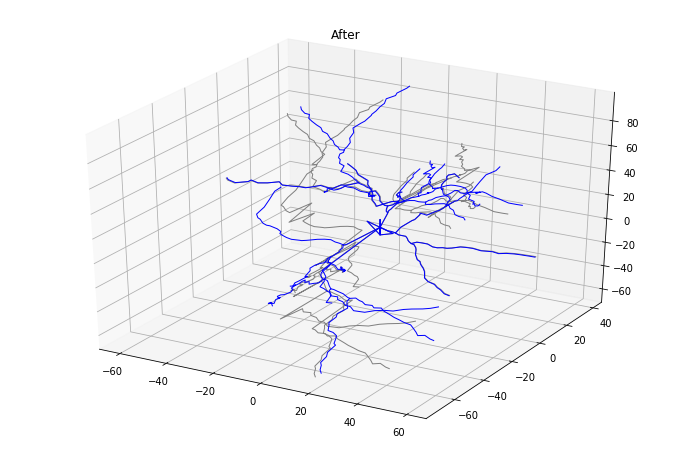

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
plot(m, ax, projection='3d', color='grey')
plot(n, ax, projection='3d')
plt.title('After');